In [1]:
from fastai.vision import *
import pandas as pd

In [2]:
import os
#os.listdir("../data/")

In [2]:
bs = 64

In [3]:
train =Path('../data/')

In [4]:
test = Path("../test/")

In [5]:
labels_df = pd.read_csv("../labels/train.csv")

In [6]:
labels = labels_df['Id'].tolist()



In [7]:
??get_transforms

In [ ]:


data_transforms = albumentations.Compose([
    albumentations.Resize(160, 320),
    albumentations.HorizontalFlip(),
    albumentations.RandomBrightness(),
    albumentations.ShiftScaleRotate(rotate_limit=15, scale_limit=0.10),
    albumentations.JpegCompression(80),
    albumentations.HueSaturationValue(),
    albumentations.Normalize(),
    AT.ToTensor()
    ])
data_transforms_test = albumentations.Compose([
    albumentations.Resize(160, 320),
    albumentations.Normalize(),
    AT.ToTensor()
    ])

In [8]:
whale_tfms = get_transforms(do_flip=False)


In [9]:
data = (ImageItemList.from_folder(train)
        #Where to find the data? -> in planet 'train' folder
        .random_split_by_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_list(labels)
        .add_test_folder(test)
        #How to label? -> use the csv file
        .transform(whale_tfms, size=224)
        #Data augmentation? -> use tfms with a size of 128
        .databunch(bs=bs))                          
        #Finally -> use the defaults for conversion to databunch
data = data.normalize(imagenet_stats)

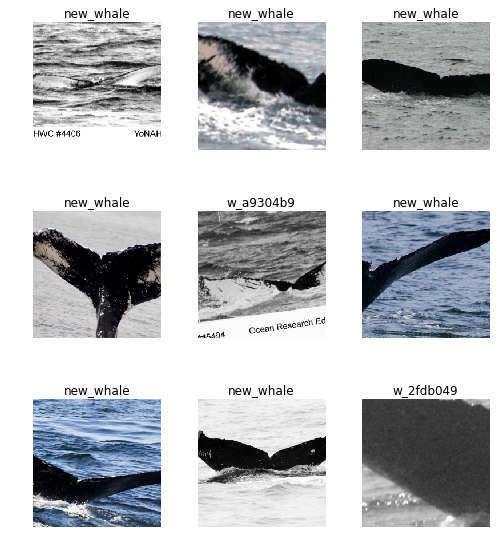

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
#data.classes, data.c, len(data.train_ds), len(data.valid_ds),len(data.classes)

In [10]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [11]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,6.240825,5.707284,0.389393
2,5.786149,5.675302,0.389393


In [28]:
learn.save('stage-1')

In [18]:
learn.unfreeze()

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


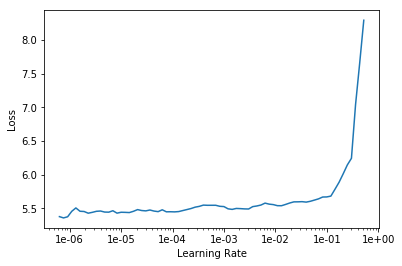

In [12]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-6))

epoch,train_loss,valid_loss,accuracy
1,5.647169,5.675406,0.389393
2,5.527156,5.675667,0.389393


In [22]:
learn.save('stage-2')

In [10]:
learn.load('stage-2');

FileNotFoundError: [Errno 2] No such file or directory: '../data/models/stage-2.pth'

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

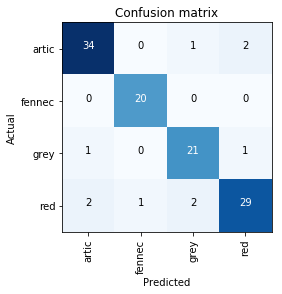

In [25]:
interp.plot_confusion_matrix()

In [26]:
from fastai.widgets import *

In [18]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

NameError: name 'DatasetFormatter' is not defined

In [28]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [30]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [31]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [13]:
preds_t,y_t = learn.TTA(is_test=True,n_aug=8)
#preds_t = np.stack(preds_t, axis=-1)
#preds_t = np.exp(preds_t)
#preds_t = preds_t.mean(axis=-1)

TypeError: _TTA() got an unexpected keyword argument 'is_test'

In [ ]:
sample_df = pd.read_csv(SAMPLE_SUB)
sample_list = list(sample_df.Image)
pred_list = [[labels_list[i] for i in p.argsort()[-5:][::-1]] for p in preds_t]
pred_dic = dict((key, value) for (key, value) in zip(learn.data.test_ds.fnames,pred_list))
pred_list_cor = [' '.join(pred_dic[id]) for id in sample_list]
df = pd.DataFrame({'Image':sample_list,'Id': pred_list_cor})
df.to_csv('submission.csv'.format(MODEL_PATH), header=True, index=False)
df.head()

In [12]:
p = learn.predict(is_test=True)

TypeError: predict() missing 1 required positional argument: 'item'

In [14]:
log_preds_test, y_test = learn.TTA(is_test=True)

TypeError: _TTA() got an unexpected keyword argument 'is_test'

In [15]:
??learn.TTA

AttributeError: test